In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [2]:
data = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/5. multi linear regression/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.shape

(50, 5)

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
datay = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/5. multi linear regression/50_Startups.csv")

In [10]:
Le = preprocessing.LabelEncoder()
datay['Stt'] = Le.fit_transform(datay['State'])

In [11]:
datay.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Stt
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [12]:
datay = datay.drop('State',axis = 1)

In [13]:
datay.head()

,R&D Spend,Administration,Marketing Spend,Profit,Stt
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [14]:
datay.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Stt'], dtype='object')

In [15]:
datay.corr()

,R&D Spend,Administration,Marketing Spend,Profit,Stt
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
Stt,0.104685,0.011847,0.077670,0.101796,1.000000


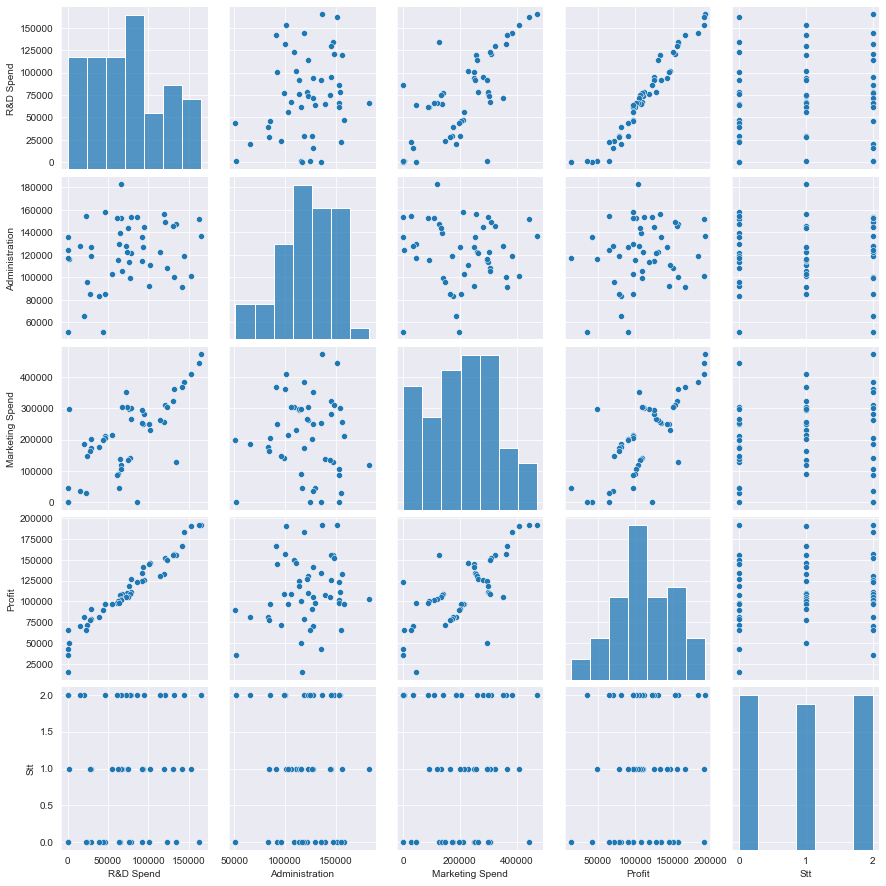

In [16]:
sns.set_style('darkgrid')
sns.pairplot(datay)

In [17]:
datay=datay.rename({"R&D Spend":"rd", "Marketing Spend":"ms"},axis='columns')
# here the name of columns are to be changed, reason: the gap between name "R&D spend"

In [18]:
datay.head()

,rd,Administration,ms,Profit,Stt
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [19]:
model = smf.ols('Profit~rd+Administration+ms+Stt',data=datay).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           8.51e-29
Time:                        16:59:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
rd                 0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
ms                 0.0272      0.017      1.637      0.109      -0.006       0.061
Stt              -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# administaration,ms,stt,>0.05, insignificant.

In [21]:
#coefitiants
model.params

Intercept         50142.506443
rd                    0.805760
Administration       -0.026826
ms                    0.027228
Stt                 -22.320577
dtype: float64

In [22]:
# tvalue,pvalue
print(model.pvalues, '\n', model.tvalues)

Intercept         2.900008e-09
rd                8.249206e-22
Administration    6.056771e-01
ms                1.086131e-01
Stt               9.889988e-01
dtype: float64 
 Intercept          7.368962
rd                17.608621
Administration    -0.519906
ms                 1.636966
Stt               -0.013865
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [24]:
# simple linear regression

In [25]:
ml_ad = smf.ols('Profit~Administration',data=datay).fit()
(ml_ad.pvalues)

Intercept         0.003824
Administration    0.162217
dtype: float64

In [26]:
ml_ms = smf.ols('Profit~ms',data=datay).fit()
(ml_ms.pvalues)

Intercept    4.294735e-10
ms           4.381073e-10
dtype: float64

In [27]:
ml_Stt = smf.ols('Profit~Stt',data=datay).fit()
(ml_Stt.pvalues)

Intercept    6.485443e-16
Stt          4.817858e-01
dtype: float64

In [28]:
ml_rd = smf.ols('Profit~rd',data=datay).fit()
(ml_rd.pvalues)

Intercept    2.782697e-24
rd           3.500322e-32
dtype: float64

In [29]:
# AD= 0.16(INSIGNIFICANT),STT=48.1(INSIGNIFICANT)
#MS=4.3*10 ,RD ( SIGNIFICANT )
#(AD,STT)

In [30]:
# CALCULATING VIF

In [31]:
rsq_rd = smf.ols('Profit~Administration+ms+Stt',data=datay).fit().rsquared  
vif_rd = (1/1-(rsq_rd))
rsq_Administration = smf.ols('Profit~rd+ms+Stt',data=datay).fit().rsquared  
vif_Administration = (1/1-(rsq_Administration))
rsq_ms = smf.ols('Profit~rd+Administration+Stt',data=datay).fit().rsquared  
vif_ms = (1/1-(rsq_ms))
rsq_Stt = smf.ols('Profit~rd+Administration+ms',data=datay).fit().rsquared  
vif_Stt = (1/1-(rsq_Stt))

d1 = {'variables':['rd','Administration','ms','Stt'],'VIF':[vif_rd,vif_Administration,vif_ms,vif_Stt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,variables,VIF
0,rd,0.388627
1,Administration,0.049550
2,ms,0.052187
3,Stt,0.049254


In [32]:
# here administration and stt having same vif value it indicates colinearity

In [33]:
# RESIDUAL ANALYSIS

In [34]:
#Q-Q PLOT

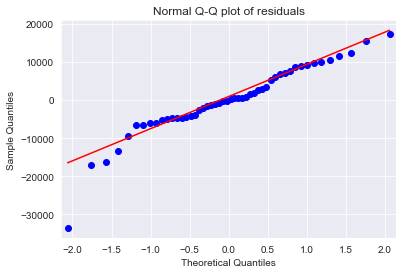

In [35]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")# line= 45 to draw the diagonal line
plt.show()

In [36]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

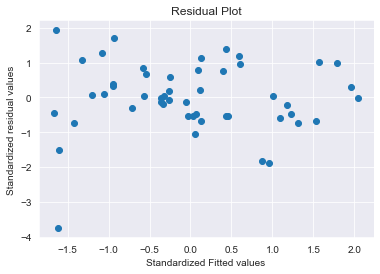

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [38]:
# MODEL DELETION DIAGNOSTICS

In [39]:
# DETECTING OUTLIERS

In [40]:
# COOKS DISTANCE

In [41]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

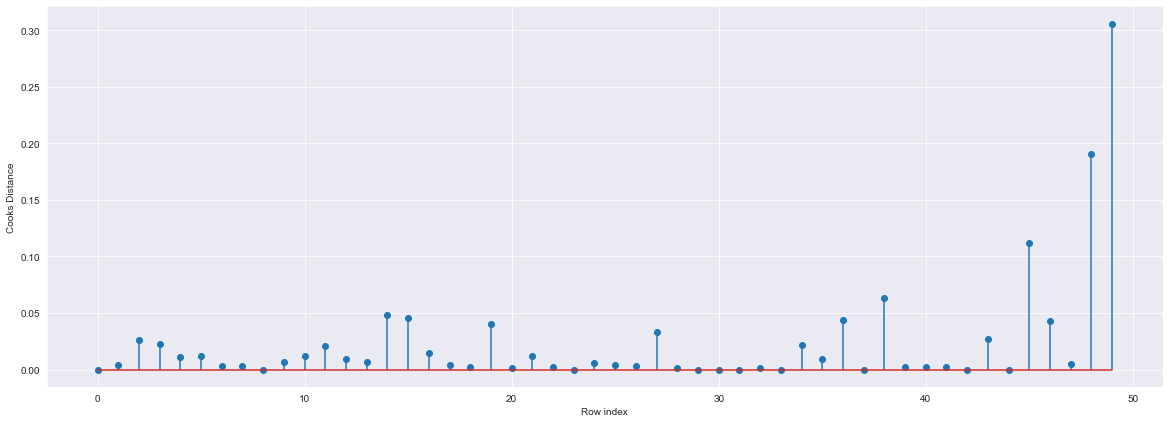

In [42]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(datay)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3060281954699341)

In [44]:
#high influence points

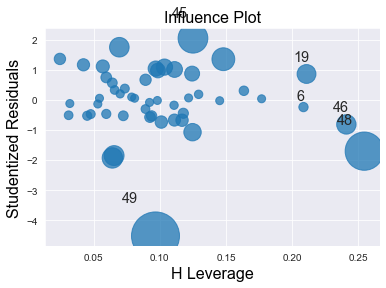

In [45]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [46]:
k = datay.shape[1]
n = datay.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [47]:
leverage_cutoff

0.36

In [48]:
# improving the model

In [49]:
#Load the dataset
s1= pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/5. multi linear regression/50_Startups.csv")

In [50]:
s1=s1.rename({"R&D Spend":"rd", "Marketing Spend":"ms"},axis='columns')

In [51]:
Le = preprocessing.LabelEncoder()
s1['Stt'] = Le.fit_transform(s1['State'])

In [52]:
s1

,rd,Administration,ms,State,Profit,Stt
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1
5,131876.90,99814.71,362861.36,New York,156991.12,2
6,134615.46,147198.87,127716.82,California,156122.51,0
7,130298.13,145530.06,323876.68,Florida,155752.60,1
8,120542.52,148718.95,311613.29,New York,152211.77,2
9,123334.88,108679.17,304981.62,California,149759.96,0


In [53]:
s2 = s1.drop(s1.index[[49,48,45]],axis=0).reset_index()

In [54]:
s2

,index,rd,Administration,ms,State,Profit,Stt
0,0,165349.20,136897.80,471784.10,New York,192261.83,2
1,1,162597.70,151377.59,443898.53,California,191792.06,0
2,2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,3,144372.41,118671.85,383199.62,New York,182901.99,2
4,4,142107.34,91391.77,366168.42,Florida,166187.94,1
5,5,131876.90,99814.71,362861.36,New York,156991.12,2
6,6,134615.46,147198.87,127716.82,California,156122.51,0
7,7,130298.13,145530.06,323876.68,Florida,155752.60,1
8,8,120542.52,148718.95,311613.29,New York,152211.77,2
9,9,123334.88,108679.17,304981.62,California,149759.96,0


In [55]:
s2 = s2.drop(['index'],axis=1)

In [56]:
s2

,rd,Administration,ms,State,Profit,Stt
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1
5,131876.90,99814.71,362861.36,New York,156991.12,2
6,134615.46,147198.87,127716.82,California,156122.51,0
7,130298.13,145530.06,323876.68,Florida,155752.60,1
8,120542.52,148718.95,311613.29,New York,152211.77,2
9,123334.88,108679.17,304981.62,California,149759.96,0


In [57]:
# build model

In [58]:
#Exclude variable "stt" and generate R-Squared and AIC value
final_ml_Administration = smf.ols('Profit~rd+Administration+ms',data = s2).fit()

In [59]:
(final_ml_Administration.rsquared,final_ml_Administration.rsquared_adj)

(0.9640877256125092, 0.9615822180971029)

In [60]:
#Exclude variable "administration" and generate R-Squared and AIC value
final_ml_Stt = smf.ols('Profit~rd+ms+Stt',data=s2).fit()

In [61]:
(final_ml_Stt.rsquared,final_ml_Stt.rsquared_adj)

(0.9627686882151599, 0.9601711548348223)

In [62]:
# Comparing above R-Square and AIC values, model 'final_ml_Administration' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [63]:
#build model 1

In [64]:
# cooks distance

In [65]:
final_ml_Administration1 = smf.ols('Profit~rd+Administration+ms',data = s2).fit()

In [66]:
model_influence_Administration1 = final_ml_Administration1.get_influence()
(c_Administration1, _) = model_influence_Administration1.cooks_distance

NameError: name 'c_Administration' is not defined

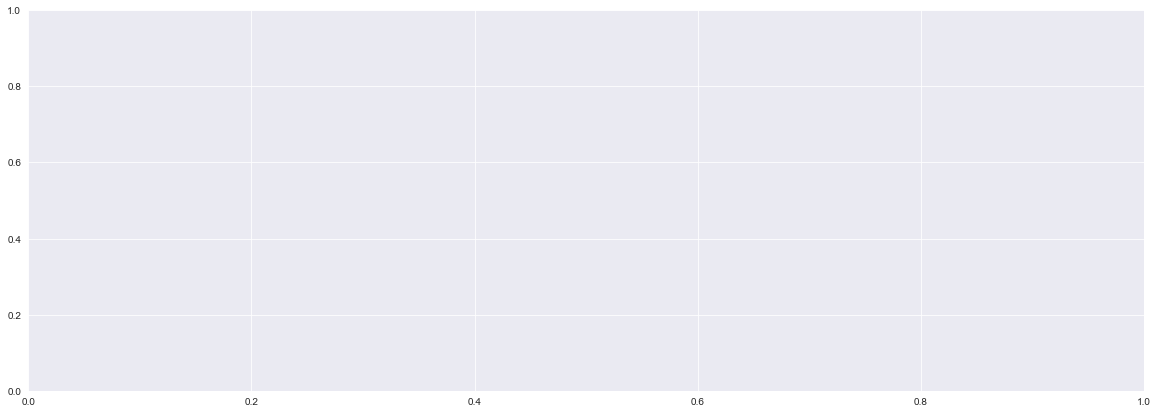

In [76]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(s2)),np.round(c_Administration,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [68]:
#index and value of influencer where c is more than .5
(np.argmax(c_Administration1),np.max(c_Administration1))

(45, 0.13078370899572253)

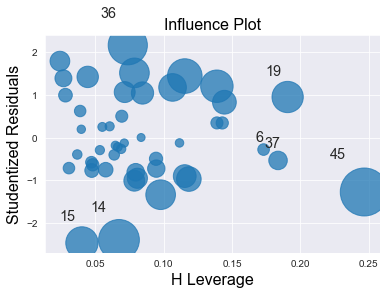

In [69]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_Administration1)
plt.show()

In [70]:
k = datay.shape[1]
n = datay.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [71]:
leverage_cutoff

0.36

In [72]:
#Drop 45 observations
s3=s2.drop(s2.index[[45]],axis=0).reset_index()

In [73]:
s3

,index,rd,Administration,ms,State,Profit,Stt
0,0,165349.20,136897.80,471784.10,New York,192261.83,2
1,1,162597.70,151377.59,443898.53,California,191792.06,0
2,2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,3,144372.41,118671.85,383199.62,New York,182901.99,2
4,4,142107.34,91391.77,366168.42,Florida,166187.94,1
5,5,131876.90,99814.71,362861.36,New York,156991.12,2
6,6,134615.46,147198.87,127716.82,California,156122.51,0
7,7,130298.13,145530.06,323876.68,Florida,155752.60,1
8,8,120542.52,148718.95,311613.29,New York,152211.77,2
9,9,123334.88,108679.17,304981.62,California,149759.96,0


In [74]:
s3=s3.drop(['index'],axis=1)

In [77]:
s3

,rd,Administration,ms,State,Profit,Stt
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1
5,131876.90,99814.71,362861.36,New York,156991.12,2
6,134615.46,147198.87,127716.82,California,156122.51,0
7,130298.13,145530.06,323876.68,Florida,155752.60,1
8,120542.52,148718.95,311613.29,New York,152211.77,2
9,123334.88,108679.17,304981.62,California,149759.96,0


In [78]:
final_ml_Administration1 = smf.ols('Profit~rd+Administration+ms',data = s3).fit()

In [79]:
(final_ml_Administration1.rsquared,final_ml_Administration1.rsquared_adj)

(0.962593650298269, 0.9599217681767168)

In [80]:
# build 2nd model

In [81]:
final_ml_Administration2 = smf.ols('Profit~rd+Administration+ms',data = s3).fit()

In [82]:
model_influence_Administration2 = final_ml_Administration2.get_influence()
(c_Administration2, _) = model_influence_Administration2.cooks_distance

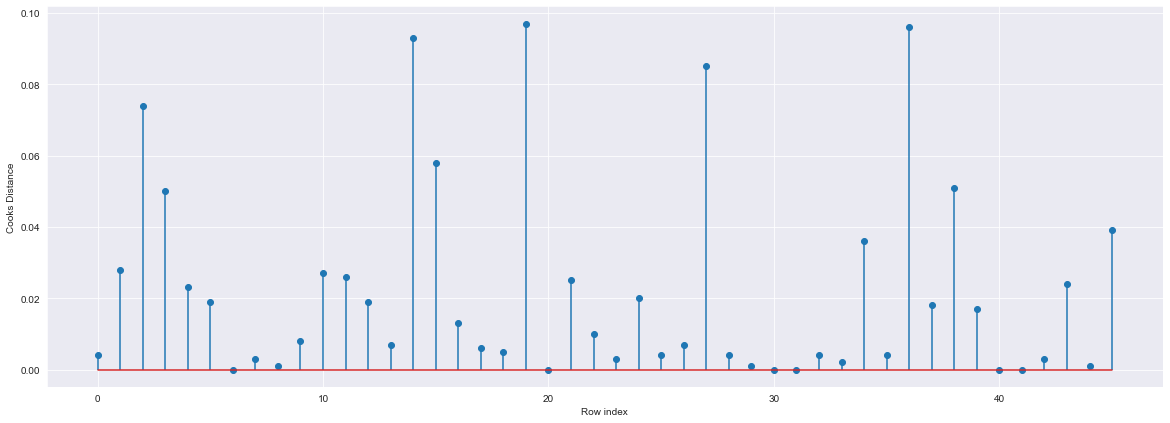

In [83]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(s3)),np.round(c_Administration2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [84]:
(np.argmax(c_Administration2),np.max(c_Administration2))

(19, 0.09705035449315445)

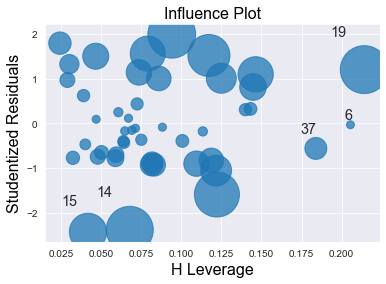

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_Administration2)
plt.show()

In [86]:
k = datay.shape[1]
n = datay.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [87]:
leverage_cutoff

0.36

In [88]:
s4=s3.drop(s3.index[[19]],axis=0).reset_index()

In [89]:
s4=s4.drop(['index'],axis=1)

In [90]:
final_ml_Administration2 = smf.ols('Profit~rd+Administration+ms',data = s4).fit()

In [91]:
(final_ml_Administration2.rsquared,final_ml_Administration2.rsquared_adj)

(0.9638487279209413, 0.9612035128907663)

In [93]:
from sklearn.model_selection import train_test_split
train_data,test_Data= train_test_split(datay,test_size=0.3)

finalmodel1 = smf.ols('Profit~rd+Administration+ms',data = s4).fit()
finalmodel1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     364.4
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.41e-29
Time:                        17:05:38   Log-Likelihood:                -460.51
No. Observations:                  45   AIC:                             929.0
Df Residuals:                      41   BIC:                             936.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.618e+04   5789.145      9.704      0.000    4.45e+04    6.79e+04
rd                 0.7549      0.042     17.952      0.000       0.670       0.840
Administration    -0.0533      0.043     -1.245      0.220      -0.140       0.033
ms                 0.0356      0.016      2.251      0.030       0.004       0.068
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.311
Skew:                          -0.042   Prob(JB):                        0.856
Kurtosis:                       2.602   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
# prediction
finalmodel_pred = finalmodel1.predict(train_data)

In [99]:
#train residuals
finalmodel_res = train_data["Profit"]-finalmodel_pred

In [100]:
##train rmse
finalmodel_rmse = np.sqrt(np.mean(finalmodel_res*finalmodel_res))

In [101]:
finalmodel_rmse

7473.754095189787

In [102]:
## test prediction
finalmodel_testpred = finalmodel1.predict(test_Data)

In [103]:
## test residuals
finalmodel_testres= test_Data["Profit"]-finalmodel_testpred

In [104]:
## test rmse
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))

In [105]:
finalmodel_testrmse

12170.971113093938

In [ ]:
### train rmse is 7473.754095189787  and test rmse is 12170.971113093938

In [ ]:
     MODEL NAME                 R^2 VALUE        DROPED POINTS
1.final_ml_Administration  0.9640877256125092   49,48,45
2.final_ml_Administration1 0.9640877256125092   45
3.final_ml_Administration2 0.9638487279209413   19